In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fABBA
import numpy as np
from fABBA import fABBA

## For univariate time series

fABBA({'_alpha': 0.1, '_sorting': 'norm', '_tol': 0.1, '_scl': 1, '_verbose': 0, '_max_len': -1, '_return_list': False, '_n_jobs': 1})
aBbCbCbCbCbCbCbCA


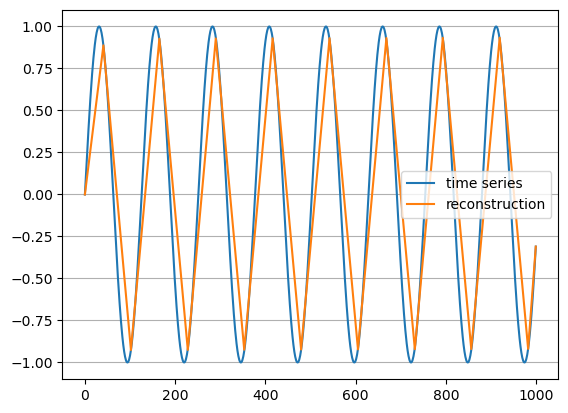

In [2]:
np.random.seed(1)
N = 100
ts = [np.sin(0.05*i) for i in range(1000)]          # original time series
fabba = fABBA(tol=0.1, alpha=0.1, sorting='norm', scl=1, verbose=0)
print(fabba)
string = fabba.fit_transform(ts)
print(string)
inverse_ts = fabba.inverse_transform(string, ts[0])
# print(inverse_ts)
plt.plot(ts, label='time series')
plt.plot(inverse_ts, label='reconstruction')
plt.legend()
plt.grid(True, axis='y')
plt.savefig('demo.png', bbox_inches='tight')
plt.show()

In [3]:
import numpy as np
from fABBA import compress
from fABBA import inverse_compress
ts = [np.sin(0.05*i) for i in range(1000)]
pieces = compress(ts, tol=0.1)               # pieces is a list of the polygonal chain pieces
inverse_ts = inverse_compress(pieces, ts[0]) # reconstruct polygonal chain from pieces

In [4]:
from fABBA import digitize
from fABBA import inverse_digitize
string, parameters = digitize(pieces, alpha=0.1, sorting='2-norm', scl=1) # compression of the polygon
print(''.join(string))                                 # prints BbAaAaAaAaAaAaAaC

inverse_pieces = inverse_digitize(string, parameters)
inverse_ts = inverse_compress(inverse_pieces, ts[0])   # numerical time series reconstruction

aBbCbCbCbCbCbCbCA


In [5]:
from sklearn.cluster import KMeans
from fABBA import ABBAbase
kmeans = KMeans(n_clusters=5, random_state=0)
abba = ABBAbase(tol=0.1, scl=1, clustering=kmeans, verbose=0)
string = abba.fit_transform(ts)
print(string)

BbAaAaAaAaAaAaAaC


In [6]:
from fABBA import ABBA
abba = ABBA(tol=0.1, scl=1, k=5, verbose=0)
string = abba.fit_transform(ts)
print(string)

BbAaAaAaAaAaAaAaC


[[41, 0.8873623686333753, 3.6230034118116965], [61, -1.8131770509611074, 5.8943962439956685], [63, 1.8484188925670724, 5.872864239427155], [63, -1.8419327359040158, 6.0541762129885885], [62, 1.8542235811893586, 5.302255051945844], [63, -1.8667731343214715, 5.356342011408053], [63, 1.8606733128740292, 5.5285684563727635], [63, -1.854441973348166, 5.703926225703665], [63, 1.8480795561940113, 5.882365740983747], [63, -1.8415865111266632, 6.063836552502611], [62, 1.8538910433278817, 5.311033760679765], [63, -1.86645423697901, 5.36535993691131], [63, 1.8603474578416228, 5.537753005228624], [63, -1.8541091836582453, 5.71327480118993], [63, 1.8477398553691717, 5.89187570000359], [63, -1.8412399231779957, 6.073505206331633], [17, 0.6087035275438032, 0.03263000855400218]]


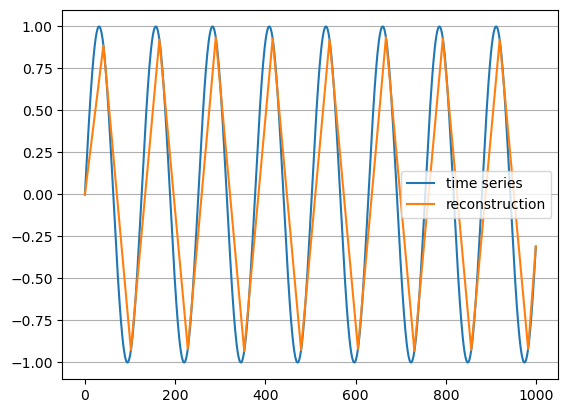

In [7]:
from fABBA import compress
from fABBA import inverse_compress

pieces = compress(ts, 0.1)
print(pieces)
inverse_ts = inverse_compress(pieces, ts[0])

plt.plot(ts, label='time series')
plt.plot(inverse_ts, label='reconstruction')
plt.legend()
plt.grid(True, axis='y')
plt.show()

In [8]:
from fABBA import digitize
from fABBA import inverse_digitize
string, parameters = digitize(pieces, alpha=0.1, sorting='2-norm', scl=1) # compression of the polygon
print(''.join(string))                                 # prints BbAaAaAaAaAaAaAaC

inverse_pieces = inverse_digitize(string, parameters)
inverse_ts = inverse_compress(inverse_pieces, ts[0])   # numerical time series

aBbCbCbCbCbCbCbCA


## For image compression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from fABBA.load_datasets import load_images
from fABBA import image_compress
from fABBA import image_decompress
from cv2 import resize

img_samples = load_images() # load fABBA image test samples
img = resize(img_samples[1], (100, 100)) # select the first image for test
fabba = fABBA(tol=0.1, alpha=0.01, sorting='2-norm', scl=1, verbose=1, max_len=-1)
strings = image_compress(fabba, img)
inverse_img = image_decompress(fabba, strings)

ModuleNotFoundError: No module named 'cv2'

In [ ]:
IMG = plt.imread('samples/img/n02101556_4241.jpg')

In [10]:
plt.imshow(img)
plt.savefig('img.png', bbox_inches='tight')
plt.show()

NameError: name 'img' is not defined

In [11]:
plt.imshow(inverse_img)
plt.savefig('inverse_img.png', bbox_inches='tight')
plt.show()

NameError: name 'inverse_img' is not defined

 ## For multivariate time series symbolization 

psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0
Generate 815 symbols
psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0


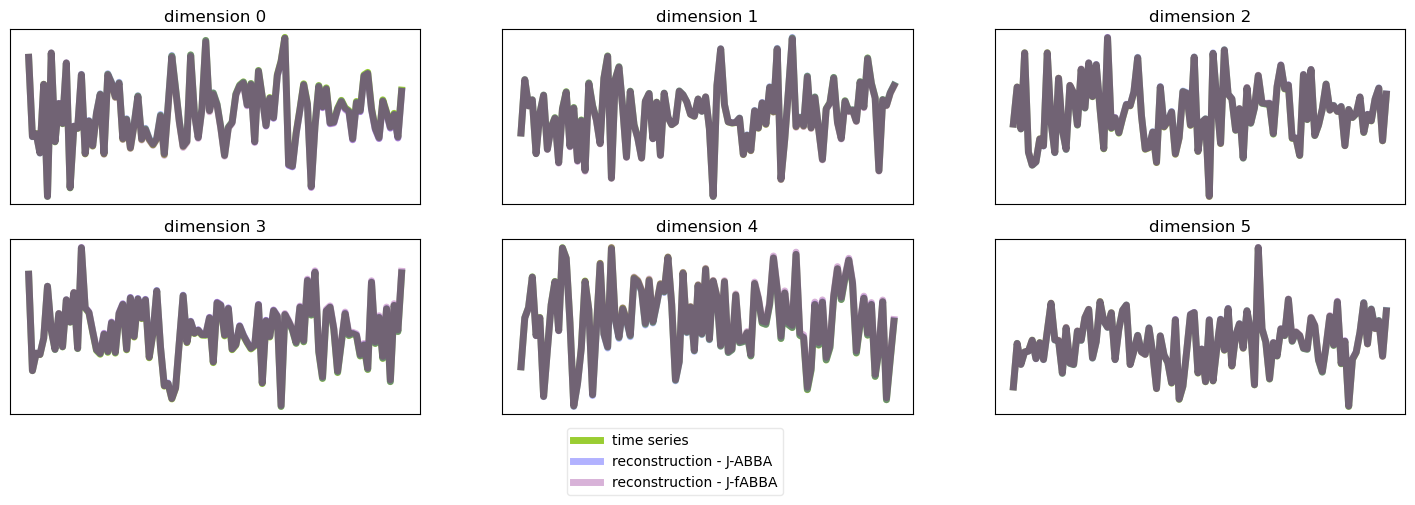

In [10]:
import os
from scipy.io import arff
from fABBA import JABBA
import matplotlib.pyplot as plt
import numpy as np


mts = np.random.randn(120, 100)
jabba1 = JABBA(tol=0.0002, verbose=1)
symbols_series = jabba1.fit_transform(mts)
reconstruction = jabba1.inverse_transform(symbols_series)

jabba2 = JABBA(tol=0.0002, init='k-means', k=jabba1.parameters.centers.shape[0], verbose=0)
symbols_series = jabba2.fit_transform(mts)
reconstruction_ABBA = jabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 5))

for i in range(2):
    for j in range(3):
        ax[i,j].plot(mts[i*3 + j], c='yellowgreen', linewidth=5,label='time series')
        ax[i,j].plot(reconstruction_ABBA[i*3 + j], c='blue', linewidth=5, alpha=0.3,label='reconstruction - J-ABBA')
        ax[i,j].plot(reconstruction[i*3 + j], c='purple', linewidth=5, alpha=0.3,label='reconstruction - J-fABBA')

        ax[i,j].set_title('dimension '+str(i*3 + j))
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[-0.5, -0.5], framealpha=0.45)
plt.show()

psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0
Generate 5 symbols


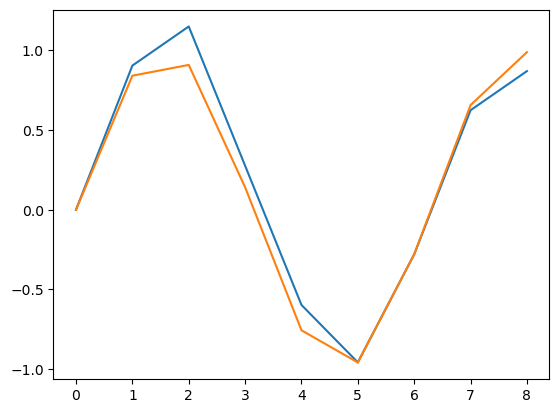

In [11]:
mts = [[np.sin(i) for i in range(9)], [np.cos(i) for i in range(8)]]

jabba1 = JABBA(tol=0.001, verbose=1, k=5, init='kmeans')
symbols_series = jabba1.fit_transform(mts)
reconstruction = jabba1.inverse_transform(symbols_series)
plt.plot(reconstruction[0])
plt.plot(mts[0])

psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0
Generate 8 symbols


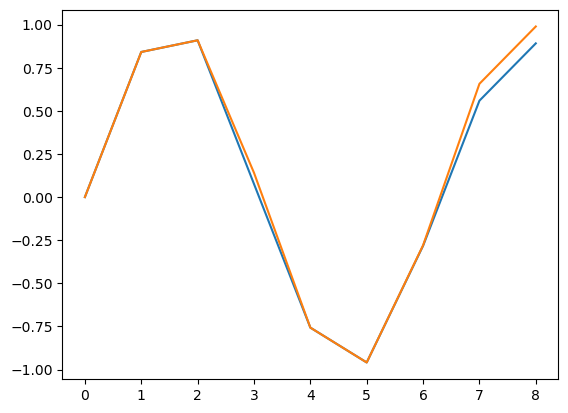

In [12]:
jabba1 = JABBA(tol=0.01, verbose=1, alpha=0.2, init='agg')
symbols_series = jabba1.fit_transform(mts)
reconstruction = jabba1.inverse_transform(symbols_series)
plt.plot(reconstruction[0])
plt.plot(mts[0])

In [15]:
len(mts[0])

9

In [16]:
jabba1.parameters.centers.shape[0] # the number of distinct symbols

8

In [17]:
sum([i for i in range(len(symbols_series))])  # the number of symbols in total

1

In [18]:
 ## For multivariate time series quantized symbolization 

psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0
Generate 829 symbols
psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0


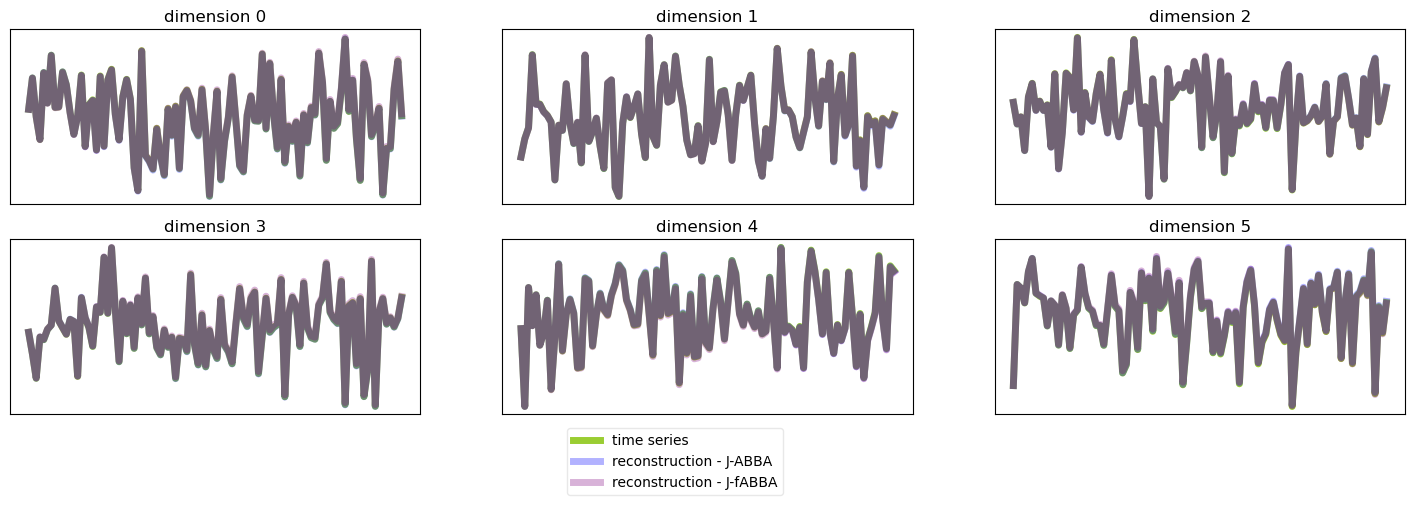

In [13]:
import os
from scipy.io import arff
from fABBA import QABBA
import matplotlib.pyplot as plt
import numpy as np


mts = np.random.randn(120, 100)
qabba1 = QABBA(tol=0.0002, verbose=1, bits_for_len=8, bits_for_inc=12)
symbols_series = qabba1.fit_transform(mts)
reconstruction = qabba1.inverse_transform(symbols_series)

qabba2 = QABBA(tol=0.0002, init='k-means', k=qabba1.parameters.centers.shape[0], bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba2.fit_transform(mts)
reconstruction_ABBA = qabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 5))

for i in range(2):
    for j in range(3):
        ax[i,j].plot(mts[i*3 + j], c='yellowgreen', linewidth=5,label='time series')
        ax[i,j].plot(reconstruction_ABBA[i*3 + j], c='blue', linewidth=5, alpha=0.3,label='reconstruction - J-ABBA')
        ax[i,j].plot(reconstruction[i*3 + j], c='purple', linewidth=5, alpha=0.3,label='reconstruction - J-fABBA')

        ax[i,j].set_title('dimension '+str(i*3 + j))
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[-0.5, -0.5], framealpha=0.45)
plt.show()

#### Varying length

In [14]:
np.array(mts)

array([[ 0.24105161,  1.11225485,  0.03519225, ...,  0.80087972,
         1.5848392 ,  0.06350857],
       [-1.08511556, -0.50702314, -0.15688275, ...,  0.02515486,
        -0.06909132,  0.25346349],
       [ 0.11466112, -0.62607046, -0.38082437, ..., -0.55465508,
        -0.0679158 ,  0.61530765],
       ...,
       [ 0.15124046,  0.5785348 , -0.35211685, ...,  0.39072295,
        -1.12441894, -0.56517317],
       [ 0.39459808,  0.66855825,  0.35475817, ...,  0.25257632,
         0.23501204,  1.4551214 ],
       [ 1.34487755, -2.13442832,  0.73418625, ...,  0.03215863,
         2.05216338, -0.46593258]])

In [15]:
isinstance(np.asarray(mts), np.ndarray)

True

In [16]:
isinstance(mts, list)

False

### Split train:test

In [17]:
mts = np.random.randn(120, 100)
rate = 0.7
split = int(np.round(rate*mts.shape[0]))
train = mts[:split]
test = mts[split+1:]

jabba = JABBA(tol=0.01, alpha=0.1, verbose=1)
train_string = jabba.fit_transform(train)
test_string, test_params = jabba.transform(test) # note transform returns two outputs

psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0
Generate 130 symbols
psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0


In [18]:
reconst_train = jabba.inverse_transform(train_string) # for train, simply inverse

reconst_test = jabba.inverse_transform(test_string, test_params) # for test, feed both string and parameters returned



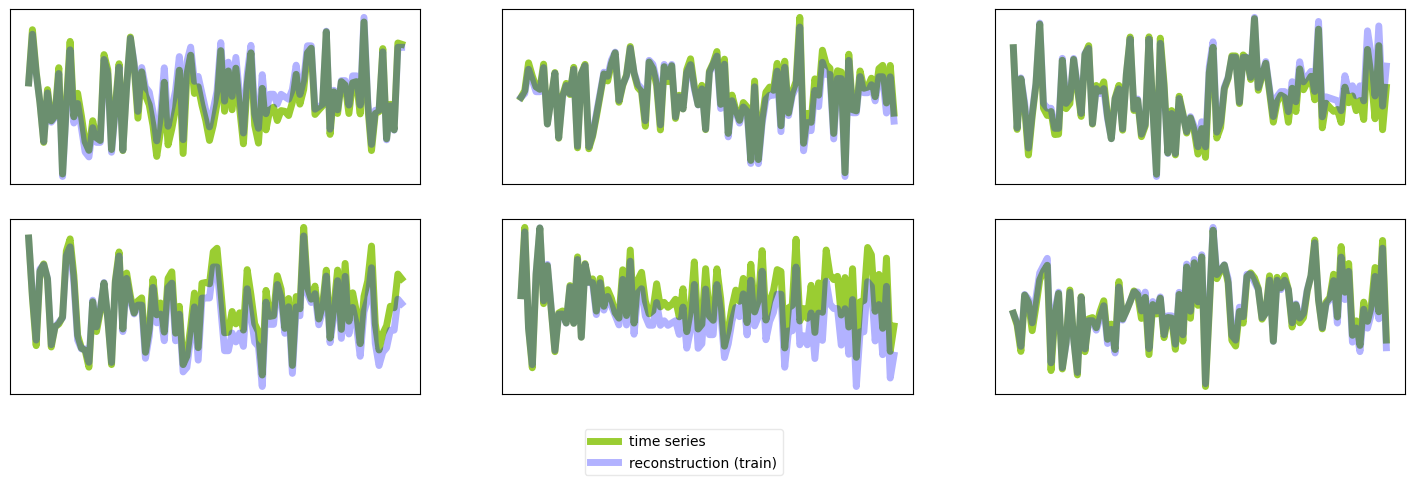

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 5))

for i in range(2):
    for j in range(3):
        ax[i,j].plot(train[i*3 + j], c='yellowgreen', linewidth=5,label='time series')
        ax[i,j].plot(reconst_train[i*3 + j], c='blue', linewidth=5, alpha=0.3,label='reconstruction (train)')

        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[-0.5, -0.5], framealpha=0.45)
plt.show()

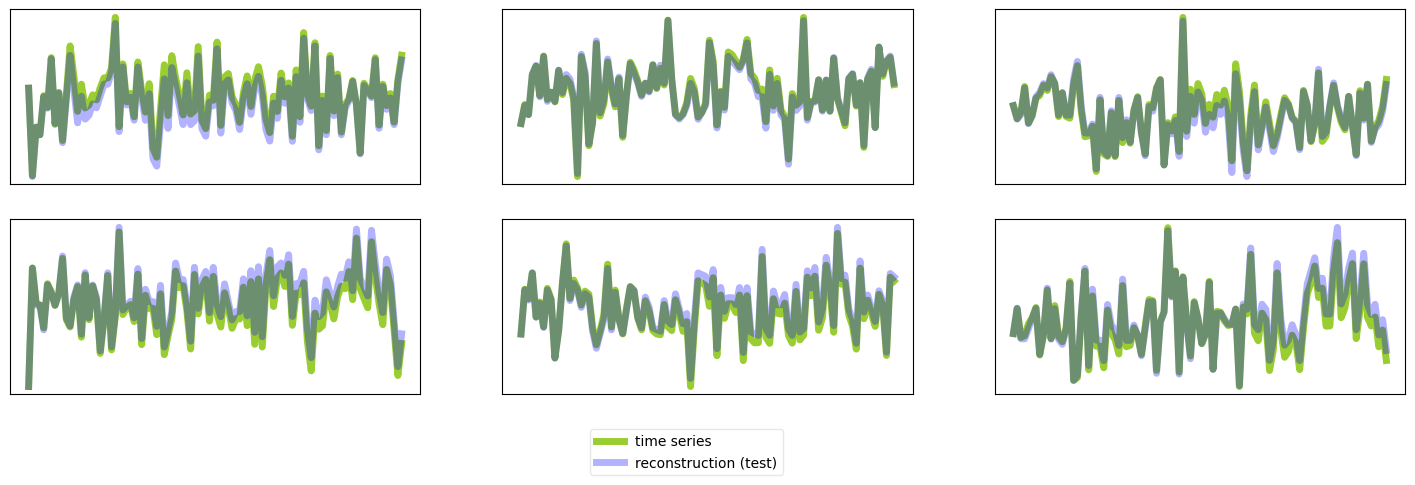

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 5))

for i in range(2):
    for j in range(3):
        ax[i,j].plot(test[i*3 + j], c='yellowgreen', linewidth=5,label='time series')
        ax[i,j].plot(reconst_test[i*3 + j], c='blue', linewidth=5, alpha=0.3,label='reconstruction (test)')

        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[-0.5, -0.5], framealpha=0.45)
plt.show()

In [27]:
from fABBA import JABBA
import numpy as np
mts = np.random.randn(10, 20, 30) # 6000 time series values

jabba = JABBA(tol=0.01, alpha=0.01, verbose=1)
symbols = jabba.fit_transform(mts)
reconst = jabba.inverse_transform(symbols)
reconst_same_shape = jabba.recast_shape(reconst)
np.linalg.norm((mts - reconst_same_shape).reshape(-1, np.prod(mts.shape[1:])), 'fro')

psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0
Generate 665 symbols


5.248913360577573

In [28]:
mts[1, 1, 2:]

array([ 0.87757571,  1.57529173, -1.5685258 ,  1.75705349,  0.41997634,
        1.18740783,  0.68482215,  0.1399794 ,  1.67684516, -1.19722784,
        1.47647816, -0.30614174,  0.65408518,  0.07034355, -1.41547435,
        1.25422934, -0.27407077,  0.10686733,  0.67926723, -1.10961161,
        1.86125882, -1.52246469, -0.72746598, -1.1385343 ,  0.51946857,
        1.53442473,  0.41650758,  0.28109123])

In [29]:
reconst_same_shape[1, 1, 2:]

array([ 0.87953304,  1.56501486, -1.57712205,  1.73510859,  0.41130224,
        1.17725079,  0.65717575,  0.13710071,  1.66388362, -1.21018939,
        1.45794153, -0.31460725,  0.63924384,  0.0555022 , -1.42821005,
        1.23992087, -0.2780363 ,  0.19736513,  0.67276656, -1.11480194,
        1.85606848, -1.52765502, -0.74532861, -1.15130786,  0.50669501,
        1.50979257,  0.39377126,  0.26829502])

### for out-of-sample data transform and shape recasting

psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0
psutil.cpu_affinity not available in this version
macOS thread_policy_get failed: Error code 46, Affinity tag: 0


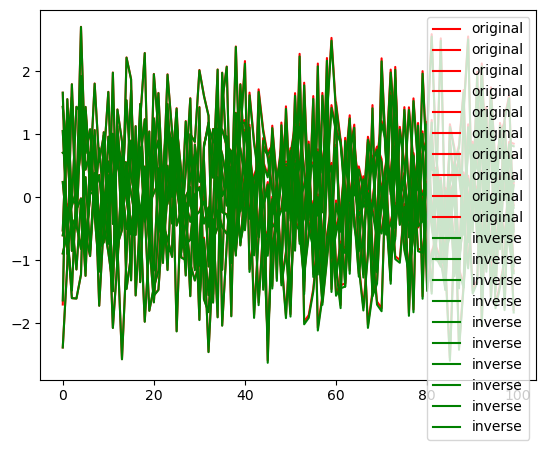

In [30]:
mts = np.random.randn(130, 100, 10)
test = mts[120:]
mts = mts[:120]

qabba = JABBA(tol=0.01, init="agg", alpha=0.001, verbose=0)

strings = qabba.fit_transform(mts) 
inverse_ts = qabba.inverse_transform(strings)
inverse_ts = qabba.recast_shape(inverse_ts)
np.sum(np.abs(mts - inverse_ts)**2)


import matplotlib.pyplot as plt
symbols_test, params_test = qabba.transform(test)
inverse_ts = qabba.inverse_transform(symbols_test, params_test)
inverse_ts = qabba.recast_shape(inverse_ts)
plt.plot(test[3], c='r', label='original')
plt.plot(inverse_ts[3], c='g', label='inverse')
plt.legend()

## For image or multidimensional array symbolization 

In [31]:
import cv2

im1 = cv2.imread('samples/img/n02101556_4241.jpg')
img1 =cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (100,100), interpolation = cv2.INTER_AREA)

im2= cv2.imread('samples/img/n02088094_3593.jpg')
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (100,100), interpolation = cv2.INTER_AREA)

ModuleNotFoundError: No module named 'cv2'

In [ ]:
img1.shape

In [ ]:
img = np.asarray([img1, img2])

In [ ]:
img.shape

In [ ]:
# For aggregation, init='agg' is default
jabba = JABBA(tol=0.01, alpha=0.1, verbose=1)
symbols = jabba.fit_transform(img)
reconst = jabba.inverse_transform(symbols) # convert into array
reconst_same_shape = jabba.recast_shape(reconst) # recast into original shape
np.linalg.norm((img - reconst_same_shape).reshape(-1, np.prod(img.shape[1:])), 'fro')

In [ ]:
jabba.recap_shape

In [ ]:
# For kmeans, init='k-means++'
jabba = JABBA(tol=0.001, k=100, init='kmeans', verbose=1) # use 100 distinct symbols
symbols = jabba.fit_transform(img)
reconst = jabba.inverse_transform(symbols) # convert into array
reconst_same_shape = jabba.recast_shape(reconst) # recast into original shape
np.linalg.norm((img - reconst_same_shape).reshape(-1, np.prod(img.shape[1:])), 'fro')

In [ ]:
# For kmeans, init='k-means++'
jabba = JABBA(tol=0.0001, k=350, init='kmeans', verbose=1) # use 100 distinct symbols
symbols = jabba.fit_transform(img)
reconst = jabba.inverse_transform(symbols) # convert into array
reconst_same_shape = jabba.recast_shape(reconst) # recast into original shape
np.linalg.norm((img - reconst_same_shape).reshape(-1, np.prod(img.shape[1:])), 'fro')